###### Problem Statement: 
To make a suitable machine learning algorithm to predict if the mushroom is 
edible or poisonous (e or p) using the given dataset.
(Along with other ML algorithms, Naïve Bayes’ Classifier should be applied)
Also, if some data pre-processing is necessary do that as well

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
mush_data=pd.read_csv('mushrooms.csv')
mush_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
mush_data.shape

(8124, 23)

In [4]:
mush_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
mush_data.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

##### find missing values in the dataset. search for '?' as it is used to replace missing values. 


In [6]:
#display the count of '?' in columns
for i in mush_data.columns:
    print(i,":",mush_data[i].where(mush_data[i] == '?').count())
   # mush_data[i] = np.where(mush_data[i]== '?', np.nan, mush_data[i])

class : 0
cap-shape : 0
cap-surface : 0
cap-color : 0
bruises : 0
odor : 0
gill-attachment : 0
gill-spacing : 0
gill-size : 0
gill-color : 0
stalk-shape : 0
stalk-root : 2480
stalk-surface-above-ring : 0
stalk-surface-below-ring : 0
stalk-color-above-ring : 0
stalk-color-below-ring : 0
veil-type : 0
veil-color : 0
ring-number : 0
ring-type : 0
spore-print-color : 0
population : 0
habitat : 0


In [7]:
#replace the '?' with most frequent value
from sklearn.impute import SimpleImputer
sim = SimpleImputer(missing_values = '?', strategy = 'most_frequent')
mush_data[['stalk-root']] = sim.fit_transform(mush_data[['stalk-root']])

mush_data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [8]:
#preprocess the missing values in stalk-root 
#mush_data['stalk-root'].value_counts(dropna=False)

In [9]:
#finding the most found value in the column

#indmax=mush_data.groupby(['stalk-root']).size().idxmax()
#replace missing values
#for i in mush_data.columns:
   # mush_data[i].fillna(indmax,inplace=True)
#indmax

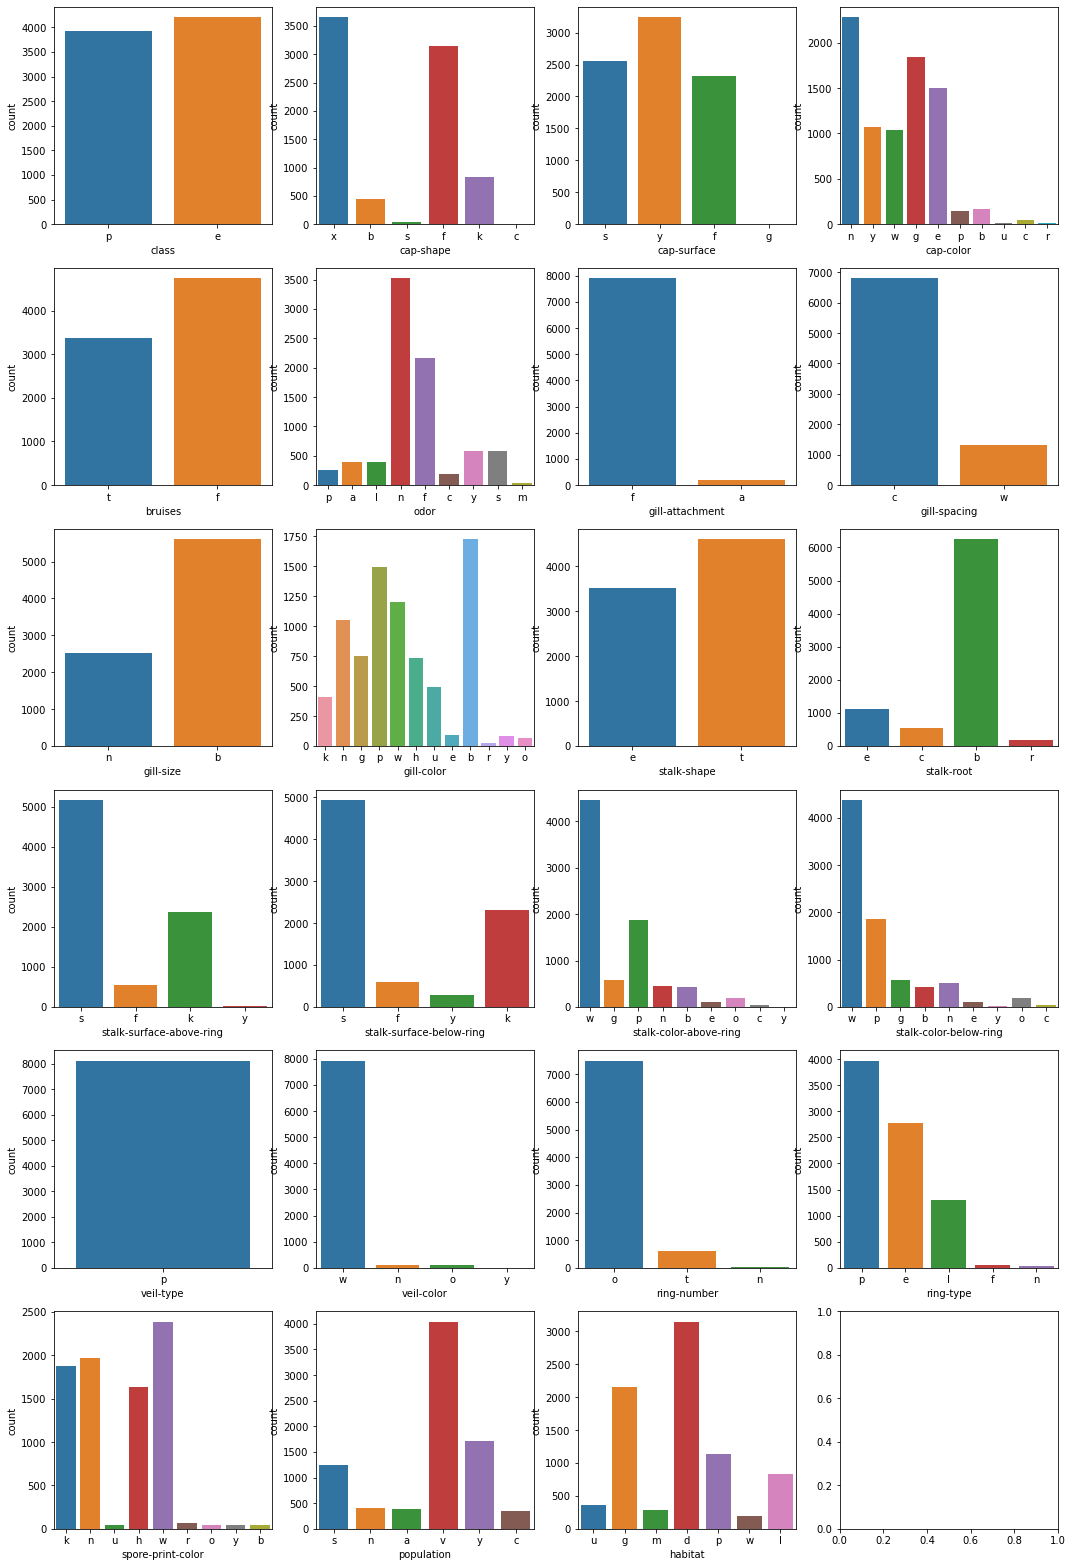

In [10]:
fig, ax = plt.subplots(6,4,figsize=(18,28))
i=0
j=0
for x in mush_data.columns:
    sns.countplot(mush_data[x], ax=ax[i][j])
    if(j==3):
        i=i+1
        j=0
    else:
        j=j+1
plt.show()

##### splitting the values to feature and target group

In [11]:
y=mush_data['class']
X=mush_data.drop(['class'],axis=1)

X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


##### Encoding

In [12]:
#encoding the category values 

from sklearn.preprocessing import LabelEncoder
label_en = LabelEncoder()

mush_data['class']=label_en.fit_transform(mush_data['class'])
col_list=X.columns.tolist()
for a in np.arange(len(col_list)):
    X[col_list[a]] = label_en.fit_transform(X[col_list[a]])
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


##### splitting the dataset to train and test set

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)


In [14]:
X_train.shape

(5686, 22)

In [15]:
len(y_train)

5686

In [16]:
X_test.shape

(2438, 22)

In [17]:
len(y_test)

2438

### 1) Naive Bayes Classifier

In [18]:
#applying Naive Bayes classifier-Bernoulli
from sklearn.naive_bayes import BernoulliNB
NBClassifier=BernoulliNB()
NBClassifier.fit(X_train,y_train)


BernoulliNB()

In [19]:
y_pred=NBClassifier.predict(X_test)
y_pred

array(['e', 'p', 'p', ..., 'e', 'e', 'e'], dtype='<U1')

In [20]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)

In [21]:
print('Confusion Matrix :\n' , cm)
print('\nAccuracy Score is :',acc)

Confusion Matrix :
 [[1188   69]
 [ 311  870]]

Accuracy Score is : 0.8441345365053322


### 2) Decision Tree classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train,y_train)
y_pred=dt_model.predict(X_test)
# using metrics module for accuracy calculation
print("ACCURACY of the model: ", accuracy_score(y_test, y_pred))
print("Confuion Matrix \n", confusion_matrix(y_test, y_pred))

ACCURACY of the model:  1.0
Confuion Matrix 
 [[1257    0]
 [   0 1181]]


### 3) Logistic Regression 

In [23]:
from sklearn.linear_model import LogisticRegression
logic_model=LogisticRegression()
logic_model.fit(X_train,y_train)
y_pred=logic_model.predict(X_test)

# using metrics module for accuracy calculation
print("ACCURACY of the model: ", accuracy_score(y_test, y_pred))
print("Confuion Matrix \n", confusion_matrix(y_test, y_pred))

ACCURACY of the model:  0.9524200164068909
Confuion Matrix 
 [[1206   51]
 [  65 1116]]


### 4) KNN Classifier

Text(0, 0.5, 'accuracy')

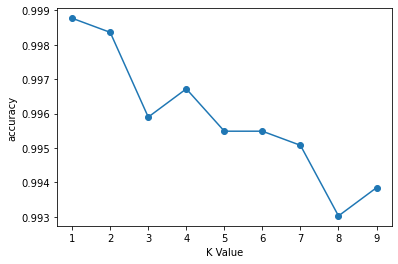

In [24]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(1,10)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    acc_values.append(accuracy)
    
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('K Value')
plt.ylabel('accuracy')

In [25]:
#testing for k value

classifier = KNeighborsClassifier(n_neighbors=1,metric='minkowski')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print("Accuracy when k=1 is",accuracy_score(y_test,y_pred))


Accuracy when k=1 is 0.9987694831829368


### 5) Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 100,random_state=0,criterion='entropy') 
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# using metrics module for accuracy calculation
print("ACCURACY of the model: ", accuracy_score(y_test, y_pred))
print("Confuion Matrix \n", confusion_matrix(y_test, y_pred))
#pd.Series(rf_model.feature_importances_, index = X.columns).sort_values(ascending = False)*100

ACCURACY of the model:  1.0
Confuion Matrix 
 [[1257    0]
 [   0 1181]]


### 6. SVM

In [27]:
from sklearn.svm import SVC
svm_radial = SVC(kernel = 'rbf')
svm_radial.fit(X_train, y_train)
y_pred = svm_radial.predict(X_test)
print('Accuracy score = ', accuracy_score(y_test, y_pred))


Accuracy score =  0.9893355209187858


In [28]:
confusion_matrix(y_test, y_pred)


array([[1254,    3],
       [  23, 1158]], dtype=int64)

### Conclusion: from the comparison tests, we can conclude that Random Forest Model and Decision Tree gives the best prediction for mushroom class